In [13]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

In [6]:
CSV_PATH = "data/weight-height.csv"


In [7]:
df = pd.read_csv(CSV_PATH)
df.sample(5)

,Gender,Height,Weight
9289,Female,62.839245,138.522099
6868,Female,61.035490,111.326962
7614,Female,65.638369,141.232386
7356,Female,63.997696,143.341661
4066,Male,66.896992,177.573446


In [29]:
df.shape

(10000, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

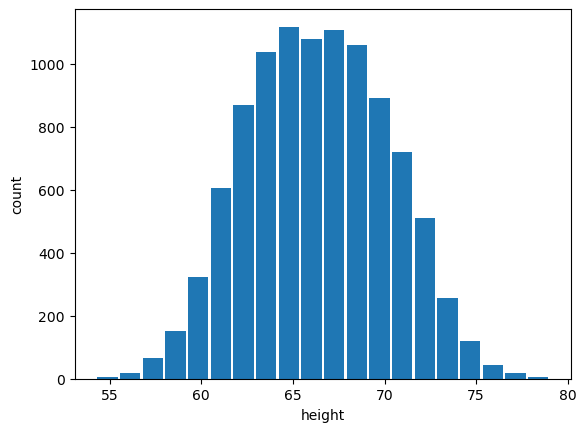

In [11]:
plt.hist(df['Height'], bins = 20, rwidth=0.9)
plt.xlabel("height")
plt.ylabel("count")
plt.show

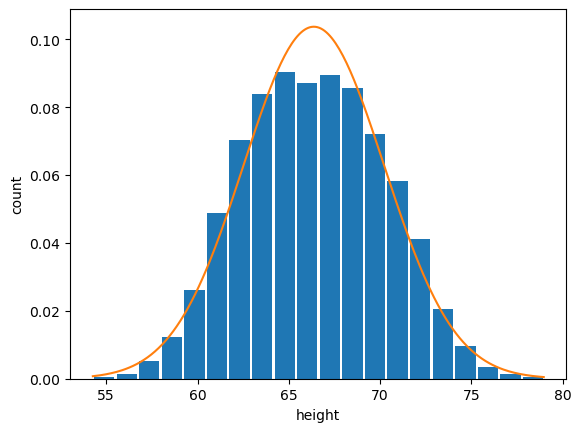

In [17]:
plt.hist(df['Height'], bins = 20, rwidth=0.9, density=True)
plt.xlabel("height")
plt.ylabel("count")

rng = np.arange(df['Height'].min(), df['Height'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, df['Height'].mean(), df['Height'].std()))

In [18]:
upper_threshold = df['Height'].mean() + 3 * df['Height'].std()
upper_threshold

np.float64(77.91014411714094)

In [20]:
df[df["Height"] > upper_threshold]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [24]:
lower_threshold = df['Height'].mean() - 3 * df['Height'].std()
lower_threshold

np.float64(54.82497539250154)

In [25]:
df[df['Height'] < lower_threshold]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [31]:
df_filtered = df[(df['Height'] > lower_threshold) & (df['Height'] < upper_threshold)]
df_filtered.sample(10)

,Gender,Height,Weight
6990,Female,63.491269,123.186629
4769,Male,66.887823,181.567086
6408,Female,63.168648,142.010379
9617,Female,64.694073,135.549114
6773,Female,63.823062,136.825949
2497,Male,68.909491,184.615536
3139,Male,63.720260,156.769607
6278,Female,64.743643,141.980647
9283,Female,64.060870,151.511363
618,Male,69.137269,196.552324


In [32]:
df_filtered.shape

(9993, 3)

Z Score

In [33]:
df['zscore'] = (df['Height'] - df["Height"].mean()) / df['Height'].std()
df.sample(10)

,Gender,Height,Weight,zscore
430,Male,76.027082,232.313471,2.510579
9526,Female,60.096442,104.413817,-1.629908
8040,Female,68.014417,149.716850,0.428030
937,Male,68.321453,206.426147,0.507831
5158,Female,64.981978,157.829152,-0.360123
7139,Female,64.088858,136.792489,-0.592251
408,Male,71.055664,203.139433,1.218472
2510,Male,69.326189,177.363588,0.768969
7861,Female,62.665861,130.995189,-0.962098
9900,Female,65.845316,146.965778,-0.135735


In [37]:
# very similar thing to std
df[df['zscore'] > 2.8]

,Gender,Height,Weight,zscore
912,Male,77.160801,228.707301,2.805240
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
1922,Male,77.446620,232.651079,2.879527
2014,Male,78.998742,269.989699,3.282934
2070,Male,77.465569,252.556689,2.884452
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
4569,Male,77.547186,242.041173,2.905665


In [38]:
df[df['zscore']  < -2.8]

,Gender,Height,Weight,zscore
5345,Female,55.336492,88.366583,-2.867053
6624,Female,54.616858,71.393749,-3.054091
7294,Female,54.873728,78.606670,-2.987329
7617,Female,55.148557,88.812412,-2.915899
9285,Female,54.263133,64.700127,-3.146027


In [39]:
df_filteredZ = df[(df['zscore'] > -2.8) & (df['zscore'] < 2.8)]
df_filteredZ.sample(10)

,Gender,Height,Weight,zscore
5223,Female,64.493236,141.735676,-0.487150
1195,Male,69.020513,177.952382,0.689521
2563,Male,70.857794,199.966387,1.167044
1093,Male,69.207100,172.775163,0.738017
2368,Male,70.462013,185.021223,1.064178
9376,Female,64.062041,140.420970,-0.599221
664,Male,70.877048,186.339824,1.172048
964,Male,73.788885,222.397561,1.928855
6450,Female,62.249214,116.605801,-1.070387
2857,Male,68.138426,192.570363,0.460261


In [40]:
df_filteredZ.shape

(9986, 4)

Bangalore Price Practice

In [41]:
CSV_PATH = "data/bhp.csv"
df = pd.read_csv(CSV_PATH)
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9536,Kanakapura,2 BHK,1017.0,2.0,66.0,2,6489
5775,other,6 BHK,1200.0,6.0,120.0,6,10000
11122,Kaikondrahalli,2 BHK,1250.0,2.0,78.0,2,6240
3237,Vasanthapura,2 BHK,420.0,2.0,35.0,2,8333
1056,other,2 BHK,1405.0,2.0,70.0,2,4982
10645,Whitefield,1 BHK,516.0,1.0,39.0,1,7558
10491,Hebbal,4 BHK,4235.0,5.0,364.0,4,8595
638,Haralur Road,2 BHK,1194.0,2.0,47.0,2,3936
2953,Varthur,2 BHK,1091.0,2.0,32.0,2,2933
4113,other,4 Bedroom,971.0,2.0,135.0,4,13903


In [47]:
df.shape

(13200, 7)

In [43]:
upper_quantile = df['price_per_sqft'].quantile(.999)
upper_quantile

np.float64(50959.36200000098)

In [44]:
lower_quantile = df['price_per_sqft'].quantile(.001)
lower_quantile

np.float64(1366.184)

In [45]:
df_quantile = df[(df['price_per_sqft'] < upper_quantile) & (df["price_per_sqft"] > lower_quantile)]
df_quantile.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3352,Subramanyapura,2 BHK,1050.0,2.0,41.00,2,3904
3645,Uttarahalli,2 BHK,1175.0,2.0,47.00,2,4000
3122,HRBR Layout,3 BHK,2800.0,3.0,250.00,3,8928
7421,Hennur Road,3 BHK,1186.0,2.0,55.33,3,4665
510,other,4 BHK,1600.0,4.0,80.00,4,5000
859,Kodigehaali,3 BHK,1320.0,3.0,65.00,3,4924
4223,other,4 BHK,4104.0,4.0,360.00,4,8771
5151,other,3 BHK,1550.0,2.0,79.00,3,5096
8961,other,4 Bedroom,2600.0,4.0,523.00,4,20115
408,Mahalakshmi Layout,6 Bedroom,1200.0,7.0,250.00,6,20833


In [46]:
df_quantile.shape

(13172, 7)

In [51]:
df_quantile['price_per_sqft'].mean()

np.float64(6663.6537351958705)

In [52]:
df_quantile['price_per_sqft'].std()

4141.020700174605

In [48]:
upper_std_lim = df_quantile['price_per_sqft'].mean() + 4 * df_quantile['price_per_sqft'].std()
upper_std_lim

np.float64(23227.73653589429)

In [ ]:
# don't have to worry about the lower limit
lower_std_lim = df_quantile['price_per_sqft'].mean() - 4 * df_quantile['price_per_sqft'].std()
lower_std_lim

np.float64(-9900.429065502549)

In [53]:
df_std = df_quantile[(df_quantile['price_per_sqft'] < upper_std_lim) &
                     (df_quantile['price_per_sqft'] > lower_std_lim)]
df_std.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3966,Varthur,2 BHK,1097.0,2.0,33.82,2,3082
9061,Thanisandra,3 BHK,1702.0,3.0,115.00,3,6756
35,Kanakpura Road,2 BHK,700.0,2.0,36.00,2,5142
4707,Haralur Road,3 BHK,1255.0,3.0,130.00,3,10358
12990,Whitefield,3 BHK,1404.0,2.0,59.00,3,4202
9717,Seegehalli,3 BHK,1683.0,3.0,80.00,3,4753
6634,Sarjapur,3 BHK,1404.0,2.0,53.35,3,3799
10023,Kodigehalli,3 Bedroom,1200.0,4.0,156.00,3,13000
6076,Uttarahalli,6 Bedroom,3600.0,6.0,303.00,6,8416
7735,other,2 BHK,985.0,2.0,156.00,2,15837


In [54]:
df_std.shape

(13047, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

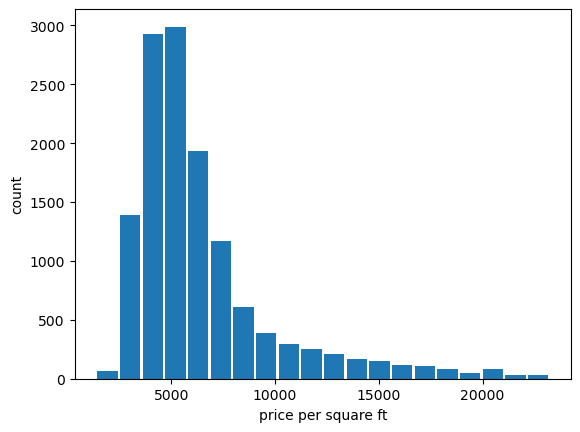

In [61]:
plt.hist(df_std['price_per_sqft'], bins = 20, rwidth=0.9)
plt.xlabel("price per square ft")
plt.ylabel("count")
plt.show

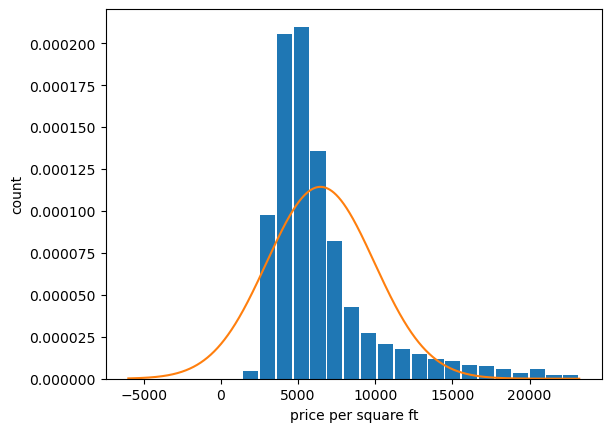

In [60]:
plt.hist(df_std['price_per_sqft'], bins = 20, rwidth=0.9, density=True)
plt.xlabel("price per square ft")
plt.ylabel("count")

rng = np.arange(-6000, df_std['price_per_sqft'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, df_std['price_per_sqft'].mean(), df_std['price_per_sqft'].std()))

In [63]:
df_quantile['zscore'] = (df_quantile['price_per_sqft'] - df_quantile['price_per_sqft'].mean()) / df_quantile['price_per_sqft'].std()
df_quantile.sample(10)

C:\Users\plang\AppData\Local\Temp\ipykernel_25840\1944443894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quantile['zscore'] = (df_quantile['price_per_sqft'] - df_quantile['price_per_sqft'].mean()) / df_quantile['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2097,Varthur,2 BHK,1112.0,2.0,40.0,2,3597,-0.740555
6089,other,8 BHK,800.0,6.0,110.0,8,13750,1.711256
8467,Akshaya Nagar,2 BHK,1000.0,2.0,38.0,2,3800,-0.691533
4353,7th Phase JP Nagar,3 Bedroom,2200.0,4.0,105.0,3,4772,-0.456809
7290,other,2 BHK,1000.0,2.0,46.0,2,4600,-0.498344
2739,Banashankari Stage VI,4 Bedroom,2200.0,4.0,195.0,4,8863,0.531112
8375,Banashankari Stage II,3 BHK,1260.0,2.0,95.0,3,7539,0.211384
8231,other,3 Bedroom,1350.0,2.0,175.0,3,12962,1.520965
2510,Whitefield,2 BHK,1215.0,2.0,65.0,2,5349,-0.317471
1087,5th Phase JP Nagar,9 Bedroom,812.0,6.0,165.0,9,20320,3.297821


In [66]:
df_zscore = df_quantile[(df_quantile['zscore'] < 4) & (df_quantile['zscore'] > -4)]
df_zscore.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5731,Devanahalli,1 BHK,1200.0,1.0,95.00,1,7916,0.302425
8631,Attibele,1 BHK,418.0,2.0,11.50,1,2751,-0.944852
9965,Kaggadasapura,4 BHK,2150.0,4.0,90.00,4,4186,-0.598320
3177,other,3 BHK,1200.0,3.0,66.00,3,5500,-0.281007
11859,Yelahanka,2 BHK,1101.0,2.0,37.00,2,3360,-0.797787
6766,Rajaji Nagar,5 BHK,7500.0,8.0,1700.00,5,22666,3.864348
11216,Hennur,3 BHK,1340.0,2.0,54.27,3,4050,-0.631162
8744,Talaghattapura,3 BHK,1372.0,2.0,43.90,3,3199,-0.836667
7469,Chandapura,3 BHK,1225.0,3.0,33.08,3,2700,-0.957168
560,Electronics City Phase 1,3 BHK,1490.0,3.0,84.00,3,5637,-0.247923


In [67]:
df_zscore.shape

(13047, 8)